### DATA

需要分别读入face和pose的数据并对应起来
- 对于siblings_face 需要读入json  
- 对于siblings_pose 需要读入csv    
- 对于Label 需要读入csv


*特别注意对于face，需要去除置信度小于阈值的数据  
*要将video的label扩展到每个frame

In [1]:
import csv
import pandas as pd
import numpy as np
import json

In [22]:
target = [["强","中","弱","没有回应（忽视）"], 
        ['中性','积极','消极'], 
        ["专注（任务中）","走神（任务外）"], 
        ["玩乐", "闲聊", "一人独立尝试一人摸鱼", "各自神游", "主导", "支持", "旁观", "冲突"]]

1. label1 回应情况

In [2]:
import os
import pandas as pd

# 读取标签文件

# 1. 回应情况- ok
label1_1 = pd.read_csv('labelA/回应情况-表格 1.csv',header=1).iloc[:,:5]
label1_2 = pd.read_csv('label_2/回应情况-表格 1.csv',header=1 ).iloc[:,:5]
# label1_3 = pd.read_csv('label_3/回应情况-表格 1.csv')

label1 = pd.concat([label1_1, label1_2], axis=0)
label1 = label1.rename(columns={"Unnamed: 0":"切片ID"})


In [18]:
cls_label = []

In [23]:
cls_1 = label1.iloc[:,1:].idxmax(axis=1)
# 使用map()函数将列名映射为数字0-3
# class_mapping = {'强': 0, '中': 1, '弱': 2, '没有回应（忽视）': 3}

class_mapping = {class_name: i for i, class_name in enumerate(target[0])}

cls_1 = cls_1.map(class_mapping)
cls_1.value_counts()



2    1604
0     952
3     859
1     580
Name: count, dtype: int64

In [3]:
label1.head()

,切片ID,强,中,弱,没有回应（忽视）
0,15YS_20230317_01/VCAM_0000,0,0,1,0
1,15YS_20230317_01/VCAM_0000_1,0,0,1,0
2,15YS_20230317_01/VCAM_0000_2,1,0,0,0
3,15YS_20230317_01/VCAM_0000_3,0,0,1,0
4,15YS_20230317_01/VCAM_0000_4,1,0,0,0


In [4]:
label1.shape

(3995, 5)

In [5]:
label1.iloc[0,0][-4:]

'0000'

In [7]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 步骤一

plt.rcParams["font.sans-serif"]=["AR PL UMing CN"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

def num_of_cls(y, target): 
    N = []
    for i in range(len(target)):
        print(target[i] + f":{len(y[y==i])}", end=", ")
        N.append(len(y[y==i]))
    print()
    return N




2. label2 互动情况积极与消极

In [25]:
# 2.互动情况的消极与积极
label2_1 = pd.read_csv('labelA/互动情况的消极与积极-表格 1.csv',header=1).iloc[:,:6]
label2_2 = pd.read_csv('label_2/互动情况的消极与积极-表格 1.csv',header=1).iloc[:,:6]

label2 = pd.concat([label2_1, label2_2], axis=0)
label2 = label2.rename(columns={"Unnamed: 0":"切片ID"})

# # 合并整体和部分(积极消极情况)
label2['积极'] = label2[['整体积极','部分积极']].sum(axis=1)
label2['消极'] = label2[['整体消极','部分消极']].sum(axis=1)

label2 = label2.drop(['整体积极','部分积极','部分消极','整体消极'],axis=1)

In [26]:
label2.head()

,切片ID,中性,积极,消极
0,15YS_20230317_01/VCAM_0000,0,1,0
1,15YS_20230317_01/VCAM_0000_1,0,1,0
2,15YS_20230317_01/VCAM_0000_2,0,1,0
3,15YS_20230317_01/VCAM_0000_3,0,1,0
4,15YS_20230317_01/VCAM_0000_4,0,1,0


In [27]:
cls_2 = label2.iloc[:,1:].idxmax(axis=1)

# 使用map()函数将列名映射为数字0-3
class_mapping = {class_name: i for i, class_name in enumerate(target[1])}

cls_2 = cls_2.map(class_mapping)
cls_2.value_counts()



0    2261
1    1130
2     604
Name: count, dtype: int64

3. label3 任务专注

In [29]:
# 3.任务专注
label3_1 = pd.read_csv('labelA/任务专注-表格 1.csv',header=1).iloc[:,:3]
label3_2 = pd.read_csv('label_2/任务专注-表格 1.csv',header=1).iloc[:,:3]

label3 = pd.concat([label3_1, label3_2], axis=0)
label3 = label3.rename(columns={"Unnamed: 0":"切片ID"})

In [30]:
label3.head()

,切片ID,专注（任务中）,走神（任务外）
0,15YS_20230317_01/VCAM_0000,1,0
1,15YS_20230317_01/VCAM_0000_1,1,0
2,15YS_20230317_01/VCAM_0000_2,1,0
3,15YS_20230317_01/VCAM_0000_3,1,0
4,15YS_20230317_01/VCAM_0000_4,1,0


In [31]:
cls_3 = label3.iloc[:,1:].idxmax(axis=1)

# 使用map()函数将列名映射为数字0-3
class_mapping = {class_name: i for i, class_name in enumerate(target[2])}

cls_3 = cls_3.map(class_mapping)
cls_3.value_counts()

0    3502
1     493
Name: count, dtype: int64

4. label4 任务内外的互动行为

In [32]:
# 4.互动行为
label4_1_1 = pd.read_csv('labelA/任务外的互动行为-表格 1.csv',header=1).iloc[:,:5]
label4_1_2 = pd.read_csv('labelA/任务中的互动行为-表格 1.csv',header=1).iloc[:,1:5]
label4_2_1 = pd.read_csv('label_2/任务外的互动行为-表格 1.csv',header=1).iloc[:,:5]
label4_2_2 = pd.read_csv('label_2/任务中的互动行为-表格 1.csv',header=1).iloc[:,1:5]

# 行连接
label4_1 = pd.concat([label4_1_1, label4_1_2], axis=1)
label4_2 = pd.concat([label4_2_1, label4_2_2], axis=1)

label4 = pd.concat([label4_1, label4_2], axis=0)
label4 = label4.rename(columns={"Unnamed: 0":"切片ID","一人独立尝试一人摸鱼\n":"一人独立尝试一人摸鱼"})

In [33]:
label4.head()

,切片ID,玩乐,闲聊,一人独立尝试一人摸鱼,各自神游,主导,支持,旁观,冲突
0,15YS_20230317_01/VCAM_0000,0,0,0,0,0,0,1,0
1,15YS_20230317_01/VCAM_0000_1,0,0,0,0,0,0,1,0
2,15YS_20230317_01/VCAM_0000_2,0,0,0,0,1,0,0,0
3,15YS_20230317_01/VCAM_0000_3,0,0,0,0,1,0,0,0
4,15YS_20230317_01/VCAM_0000_4,0,0,0,0,1,0,0,0


In [34]:
cls_4 = label4.iloc[:,1:].idxmax(axis=1)

# 使用map()函数将列名映射为数字0-3
class_mapping = {class_name: i for i, class_name in enumerate(target[3])}

cls_4 = cls_4.map(class_mapping)
cls_4.value_counts()

6    1188
5    1158
4    1118
2     417
1      46
7      34
3      21
0      13
Name: count, dtype: int64

In [35]:
cls_label = [cls_1, cls_2, cls_3, cls_4]


In [37]:
type(cls_label[0])

pandas.core.series.Series

In [38]:
data = pd.read_csv('data.csv')

In [59]:
X = data.drop(['y1','y2','y3','y4'],axis=1)
y1 = data['y1']
y2 = data['y2']
y3 = data['y3']
y4 = data['y4']
y = data[['y1','y2','y3','y4']]

In [48]:
idx = np.where(np.isnan(X).any(axis=1)==True)[0]
idx

array([1564])

In [56]:
np.where(X.iloc[1564].isna())

(array([ 8,  9, 10, 11, 12, 13]),)

In [57]:
X.iloc[1564,8:12]

high8    NaN
high9    NaN
high10   NaN
high11   NaN
Name: 1564, dtype: float64

In [47]:
X.iloc[1564,0]

0.3552302631578947

In [61]:
X = np.array(X)
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
y4 = np.array(y4)
y = np.array(y)

处理过的数据

强:873, 中:524, 弱:1506, 没有回应（忽视）:753, 


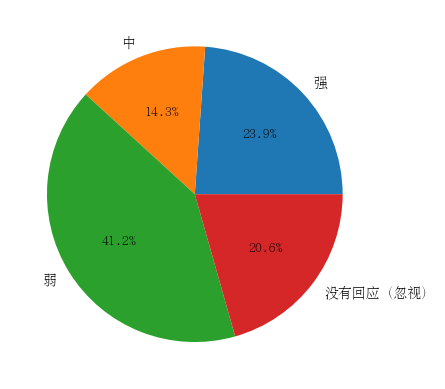

中性:2069, 积极:1076, 消极:511, 


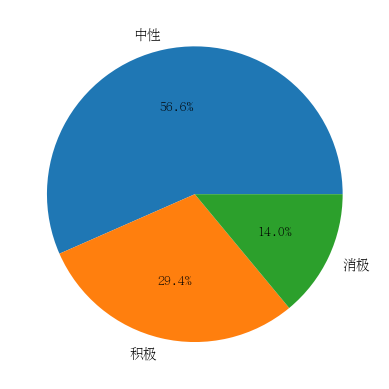

专注（任务中）:3216, 走神（任务外）:440, 


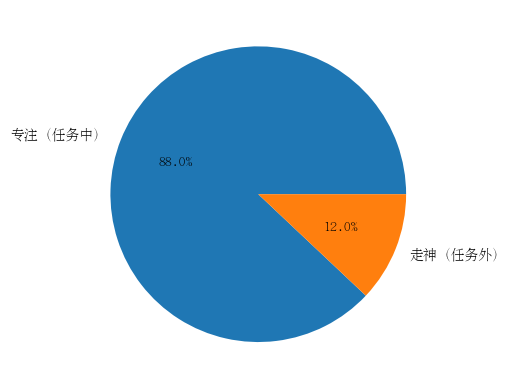

玩乐:13, 闲聊:39, 一人独立尝试一人摸鱼:372, 各自神游:20, 主导:1022, 支持:1045, 旁观:1121, 冲突:24, 


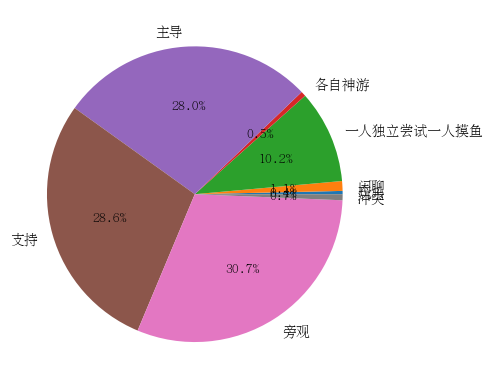

In [62]:
for i in range(4):
    N = num_of_cls(y[:,i],target[i])
    # proportions = [ p/len(y) for p in N]
    plt.pie(N,labels=target[i],autopct='%1.1f%%')
    plt.show()

强:952, 中:580, 弱:1604, 没有回应（忽视）:859, 


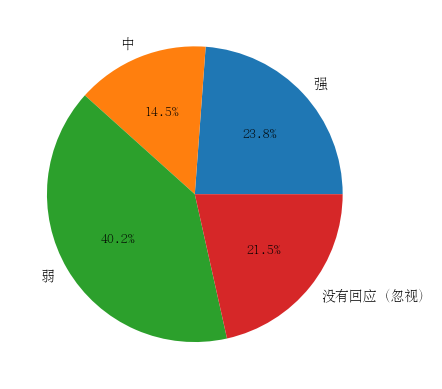

中性:2261, 积极:1130, 消极:604, 


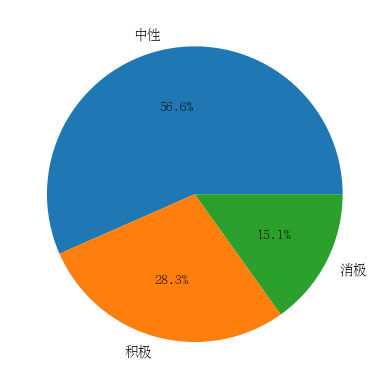

专注（任务中）:3502, 走神（任务外）:493, 


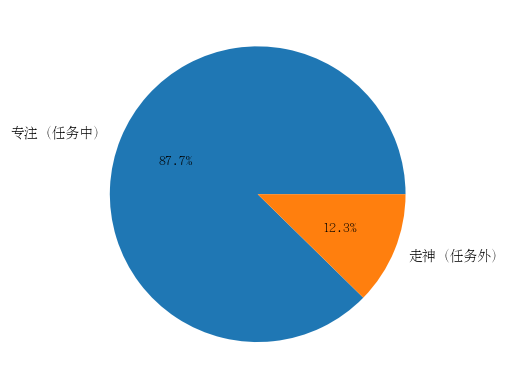

玩乐:13, 闲聊:46, 一人独立尝试一人摸鱼:417, 各自神游:21, 主导:1118, 支持:1158, 旁观:1188, 冲突:34, 


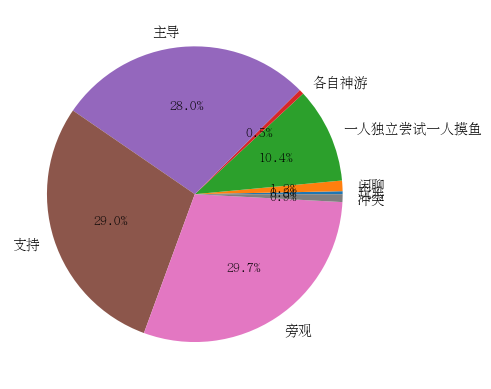

In [64]:
for i in range(4):
    N = num_of_cls(cls_label[i],target[i])
    # proportions = [ p/len(y) for p in N]
    plt.pie(N,labels=target[i],autopct='%1.1f%%')
    plt.show()